# Day One

In [1]:
#%pip install tensorflow

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
# loading dataset
#mnist

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# shape of traning data
print(x_train.shape)

# shape of testing data

print(x_test.shape)

# 28*28 is picture size

(60000, 28, 28)
(10000, 28, 28)


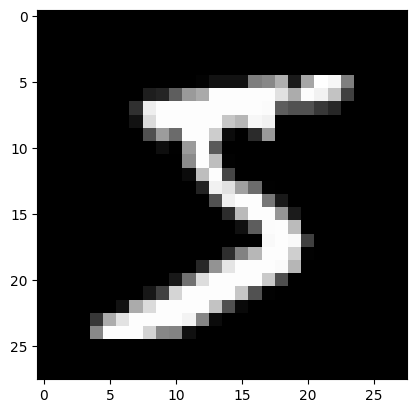

In [5]:
# resolution of image is 28*28
# every image is a 28*28 matrix, matrix of piexls
# every pixel is a number between 0 and 255, 0--> black, 255--> white

# lets see the first image

plt.imshow(x_train[0], cmap='gray')

In [6]:
# MNIST dataset is a dataset of 28x28 images of handwritten digits and the labels are from 0 to 9

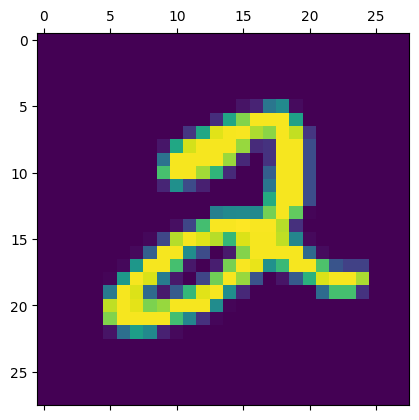

In [7]:
# another way to see the image
plt.matshow(x_train[5])

In [8]:
# what if we want to see the image
print(x_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

In [9]:
# now we need to flatten the array
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

# alternatove way to flatten the array
x_train_flattened = x_train.reshape(-1, 28*28)
x_test_flattened = x_test.reshape(-1, 28*28)


In [10]:
# shape of flattened array
print(x_train_flattened.shape)

(60000, 784)


In [11]:
# since 28*28 = 784, we know that it flattend correctly

In [12]:
# Model building

In [13]:
# we are going to use keras to build the model, no hidden layer in this model
model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')

    ]
)

# thats it, we have built the model!

In [14]:
#lets compile the model
model.compile(
    optimizer='adam', # makes sure that the model is learning and improving, impoveing the time it takes to reach global minima
    loss='sparse_categorical_crossentropy', # loss function, how far we are from the correct answer
    metrics=['accuracy'] # what measure we are going to use to see how well the model is doing
)

In [15]:
# compiling done!! Now we need to train the model

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 10.1350 - accuracy: 0.8398
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 6.1621 - accuracy: 0.8774
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.6962 - accuracy: 0.8818
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.5055 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.4047 - accuracy: 0.8880


In [16]:
# now lets eval the model!
model.evaluate(x_test_flattened, y_test) # 90% accuracy

313/313 [==============================] - 1s 2ms/step - loss: 5.2715 - accuracy: 0.9026


[5.271491527557373, 0.9025999903678894]

In [17]:
# lets see whta happens if we add anoter layer
model = keras.Sequential(
    [
        keras.layers.Dense(100, input_shape=(784,), activation='sigmoid'),
        keras.layers.Dense(10, activation='sigmoid')

    ]
)

#lets compile the model
model.compile(
    optimizer='adam', # makes sure that the model is learning and improving, impoveing the time it takes to reach global minima
    loss='sparse_categorical_crossentropy', # loss function, how far we are from the correct answer
    metrics=['accuracy'] # what measure we are going to use to see how well the model is doing
)

# compiling done!! Now we need to train the model

model.fit(x_train_flattened, y_train, epochs=5)

# now lets eval the model!
model.evaluate(x_test_flattened, y_test) # 91% accuracy

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5617 - accuracy: 0.8482
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3760 - accuracy: 0.8921
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3339 - accuracy: 0.9003
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3238 - accuracy: 0.9030
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2868 - accuracy: 0.9137


[0.2867867052555084, 0.9136999845504761]

In [18]:
# thats very good! we see a 3% increase in accuracy by adding a hidden layer!!
# lets  see what happens if we add more hidden layers

model = keras.Sequential(
    [
        keras.layers.Dense(100, input_shape=(784,), activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ]
)

#lets compile the model
model.compile(
    optimizer='adam', # makes sure that the model is learning and improving, impoveing the time it takes to reach global minima
    loss='sparse_categorical_crossentropy', # loss function, how far we are from the correct answer
    metrics=['accuracy'] # what measure we are going to use to see how well the model is doing
)

# compiling done!! Now we need to train the model

model.fit(x_train_flattened, y_train, epochs=5)

# now lets eval the model!
model.evaluate(x_test_flattened, y_test) # 96.9% accuracy

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3576 - accuracy: 0.8981
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1812 - accuracy: 0.9500
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1453 - accuracy: 0.9619
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1251 - accuracy: 0.9679
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1302 - accuracy: 0.9677


[0.13019083440303802, 0.9677000045776367]

In [19]:
# lets see if we make a 5 layer model (4 hidden layer, one input layer and one output layer) with the input layer having the number of pixels in the image, and the output layer having the number of classes in the dataset

model = keras.Sequential(
    [
        keras.layers.Dense(784, input_shape=(784,), activation='sigmoid'),
        keras.layers.Dense(450, activation='sigmoid'),
        keras.layers.Dense(250, activation='sigmoid'),
        keras.layers.Dense(10, activation='sigmoid')

    ]
)

#lets compile the model
model.compile(
    optimizer='adam', # makes sure that the model is learning and improving, impoveing the time it takes to reach global minima
    loss='sparse_categorical_crossentropy', # loss function, how far we are from the correct answer
    metrics=['accuracy'] # what measure we are going to use to see how well the model is doing
)

# compiling done!! Now we need to train the model

model.fit(x_train_flattened, y_train, epochs=10)

# now lets eval the model!

model.evaluate(x_test_flattened, y_test) # 92% accuracy

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4102 - accuracy: 0.8756
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2753 - accuracy: 0.9140
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2367 - accuracy: 0.9241
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2098 - accuracy: 0.9344
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1887 - accuracy: 0.9398
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1770 - accuracy: 0.9447
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1639 - accuracy: 0.9474
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1549 - accuracy: 0.9510
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1471 - accuracy: 0.9529
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1579 

[0.15786069631576538, 0.9506000280380249]

# Second Day

In [20]:
# lets try using catagorical entropy

### The formula for Sparse Catagorical Cross entropy (The one we used in the above models) :

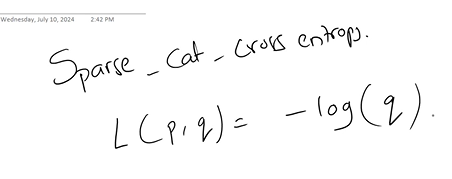

In [21]:
# to use catagorical entropy this we need to one hot-encode..

### what is one hot encode? Example pic:

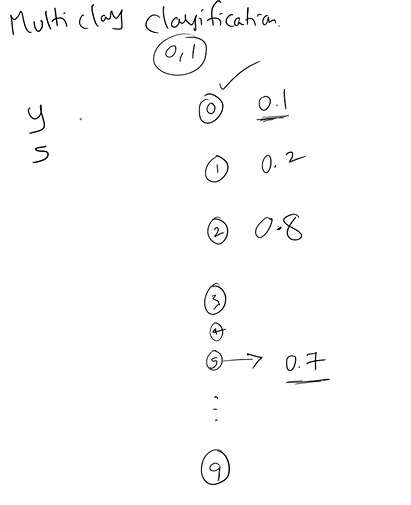

In [22]:
# the persentges are just the porbabilty that the model thinks that the number given is a certin output

In [23]:
# lets one hot encode the data now!
import pandas as pd
y_test, y_train = pd.get_dummies(y_test), pd.get_dummies(y_train)

In [24]:
y_test.head()

,0,1,2,3,4,5,6,7,8,9
0,False,False,False,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [25]:
# Now convert bool to int
y_test = y_test.astype(int)
y_train = y_train.astype(int)

In [26]:
y_test.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


In [27]:
#Yay! our data is now one-hot encoded!

In [28]:
#lets see the perforance hit/bump

In [29]:


model = keras.Sequential(
    [
        keras.layers.Dense(784, input_shape=(784,), activation='sigmoid'),
        keras.layers.Dense(450, activation='sigmoid'),
        keras.layers.Dense(250, activation='sigmoid'),
        keras.layers.Dense(10, activation='sigmoid')

    ]
)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=10)

test_loss, test_acc = model.evaluate(x_test_flattened, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4036 - accuracy: 0.8760
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2737 - accuracy: 0.9139
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2337 - accuracy: 0.9254
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2038 - accuracy: 0.9354
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1871 - accuracy: 0.9404
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1768 - accuracy: 0.9437
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1672 - accuracy: 0.9460
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1533 - accuracy: 0.9503
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1490 - accuracy: 0.9518
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1632 

In [30]:
#  Yaaa I really expected more.. I debugged it but it seems to be around this value.. next time lets chnge smth with teh x_data

In [31]:
# Now lets try to reduce the pixcel values of x_vals to 0-1


In [32]:
x_train_normal = x_train_flattened.reshape(len(x_train), 28 * 28) / 255
x_test_normal = x_test_flattened.reshape(len(x_test), 28 * 28) / 255

In [33]:
# now lets try training the model again..

In [34]:
model = keras.Sequential(
    [
        keras.layers.Dense(784, input_shape=(784,), activation='sigmoid'),
        keras.layers.Dense(450, activation='sigmoid'),
        keras.layers.Dense(250, activation='sigmoid'),
        keras.layers.Dense(10, activation='sigmoid')

    ]
)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_normal, y_train, epochs=10)

test_loss, test_acc = model.evaluate(x_test_normal, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3462 - accuracy: 0.8921
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1364 - accuracy: 0.9587
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0896 - accuracy: 0.9724
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0640 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0475 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0349 - accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0288 - accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0212 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0194 - accuracy: 0.9934
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0842 

In [ ]:
# now lets try to changeteh actication funtions.. softmax is really good for one  hot encoded models.. also lets incrse our neron size!

In [39]:
model = keras.Sequential(
    [
        keras.layers.Dense(784, input_shape=(784,), activation='sigmoid'),
        keras.layers.Dense(1000, activation='sigmoid'),
        keras.layers.Dense(500, activation='sigmoid'),
        keras.layers.Dense(10, activation='sigmoid')

    ]
)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',"mse"])

model.fit(x_train_normal, y_train, epochs=15)

model.evaluate(x_test_normal, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3459 - accuracy: 0.8889 - mse: 0.2542
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1299 - accuracy: 0.9604 - mse: 0.2121
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0870 - accuracy: 0.9728 - mse: 0.1818
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0632 - accuracy: 0.9803 - mse: 0.1561
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0475 - accuracy: 0.9847 - mse: 0.1331
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0356 - accuracy: 0.9890 - mse: 0.1067
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0288 - accuracy: 0.9904 - mse: 0.0869
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0223 - accuracy: 0.9926 - mse: 0.0678
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - lo

In [ ]:
 # Woww Ig the nuerons were not the problum! Anyways, a 98%% accurcay is still very good!!!